In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:

X_train.shape

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [ ]:

X_test.shape

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape


(28, 28)

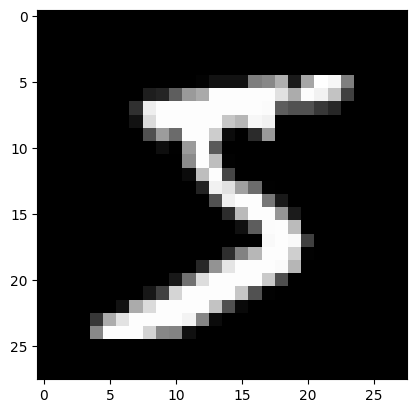

In [ ]:
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

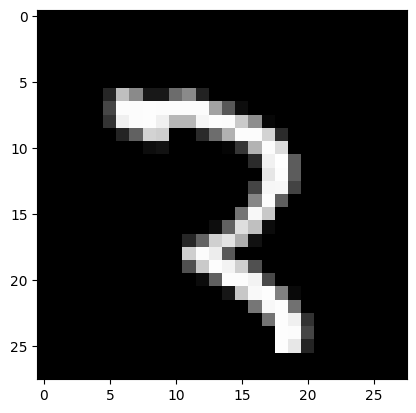

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model=keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 16)                86544     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 24s 25ms/step - loss: 0.2840 - accuracy: 0.9123 - val_loss: 0.1138 - val_accuracy: 0.9662
Epoch 2/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.0676 - val_accuracy: 0.9768
Epoch 3/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0571 - val_accuracy: 0.9805
Epoch 4/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0529 - val_accuracy: 0.9817
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0508 - val_accuracy: 0.9826


313/313 [==============================] - 3s 7ms/step
[[ 975    0    1    1    0    1    1    0    1    0]
 [   0 1130    2    0    0    0    2    0    1    0]
 [   2    7 1001    5    2    0    2    5    7    1]
 [   0    0    2  994    0   11    0    0    3    0]
 [   2    0    1    0  974    0    2    0    1    2]
 [   1    0    1    5    0  880    5    0    0    0]
 [  11    2    0    1    2    2  939    0    1    0]
 [   1    6    8    3    0    0    0 1002    5    3]
 [   4    1    0    1    2    2    2    1  960    1]
 [   3    4    0    2   12    8    0    0    9  971]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98  

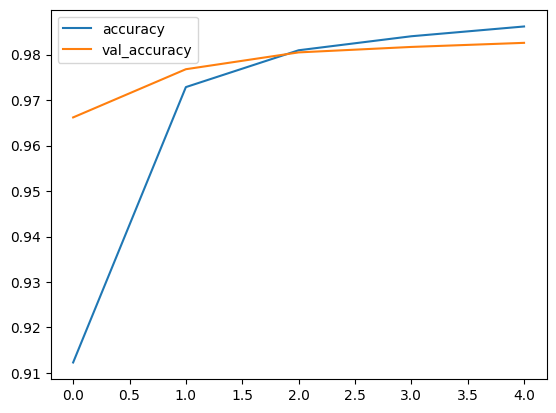

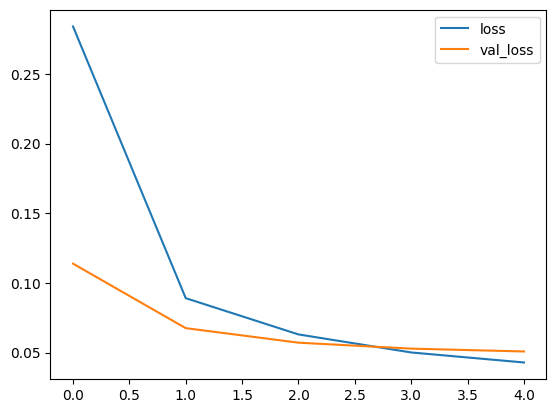

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

In [ ]:
img = image.load_img('d1.png')
type(img)
img = image.load_img('d1.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 43ms/step


In [ ]:
print(x_single_prediction)

[1]


1/1 [==============================] - 0s 60ms/step
[5]


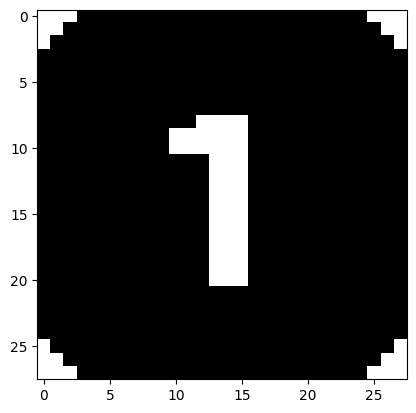

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)